# Dimension Reduction with PCA

In this noteobook, you will further explore PCA for dimension reduction. This is a continuation of the code demo we saw in the notebook `01-DEMO-DimensionReductionWithPCA`.

For this assignment, please do the following:
- Work through the first portion of the notebook 'PCA on MNIST'. You don't really have to do any coding here, just read along and evaluate the cells to run the code blocks. Feel free to change parameters to explore the dataset and test how various things work!
- Fill in the missing code in the second portion of the notebook 'PCA on Faces'.

If you are new to Python and/or Jupyter notebooks, first work through the notebook `00-Tutorial-IntroductionToPython`.

**Note:** Feel free to refer to the other notebook when working through this one. For example, it's perfectly fine to copy code chunks from the other notebook, then adjust them accordingly to do an exercise in this notebook!

In general, feel free to search the internet for anything you need to help you code!

## PCA on MNIST

### Loading the Data

We'll start by loading up the MNIST dataset of handwritten digit images. Some sample images from the dataset are plotted.

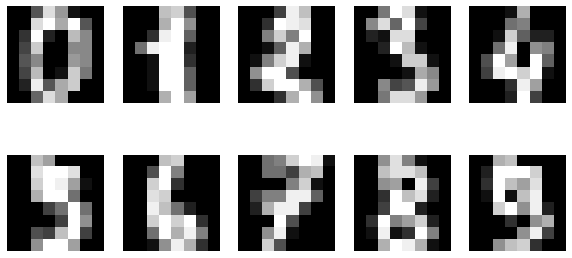

In [1]:
from sklearn.datasets import load_digits # Loading the load_digits function, which gets MNIST for us

digits = load_digits()

import matplotlib.pyplot as plt # matplotlib is a plotting package

fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(digits.images[j], cmap='gray')
    
plt.show()

Recall that the dataset consists of 1797 data points. Each one is an 8x8 matrix, which is reshaped into a vector in $\mathbb{R}^{64}$. The dataset is organized in a data matrix `digits.data`. For easier reference, let's rename this data matrix as `X`.

In [2]:
X = digits.data # Setting X equal to the data matrix
print(f'The shape of the data matrix is {X.shape[0]} rows by {X.shape[1]} columns.')

The shape of the data matrix is 1797 rows by 64 columns.


One aspect of PCA is that the data should be 'centered'; that is, the average of all of the vectors in the data set should be zero. We can acheive this by subtracting off the mean from our data.

The PCA model from `sklearn` will do this automatically, but let's do it first 'by hand'. 

In [3]:
import numpy as np # Import the numpy package for matrix computations

X = X - np.mean(X, axis = 0)

Now our pictures of the digits look a little worse, but this will be better for comparing to PCA vectors later:

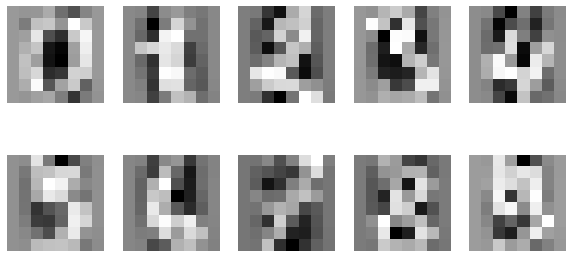

In [4]:
fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(X[j,:].reshape(8,8), cmap='gray')
    
plt.show()

### Loading and Fitting PCA

The following code loads the PCA model from the package `sklearn` and fits it to the data matrix `X`.

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA()
proj = pca.fit(X) # Solves the PCA problem for our dataset X

Recall that PCA finds an orthonormal basis which is optimally aligned to the data (in a precise sense, described in class). The `components_` attribute of the fitted model gives us the basis. Each row is a vector in $\mathbb{R}^{64}$, representing a PCA vector.

In [7]:
pca.components_.shape

(64, 64)

We can visualize a PCA vector by reshaping it into an $8 \times 8$ matrix and using the `imshow` function from `matplotlib`. The following code plots the first 10 PCA vectors.

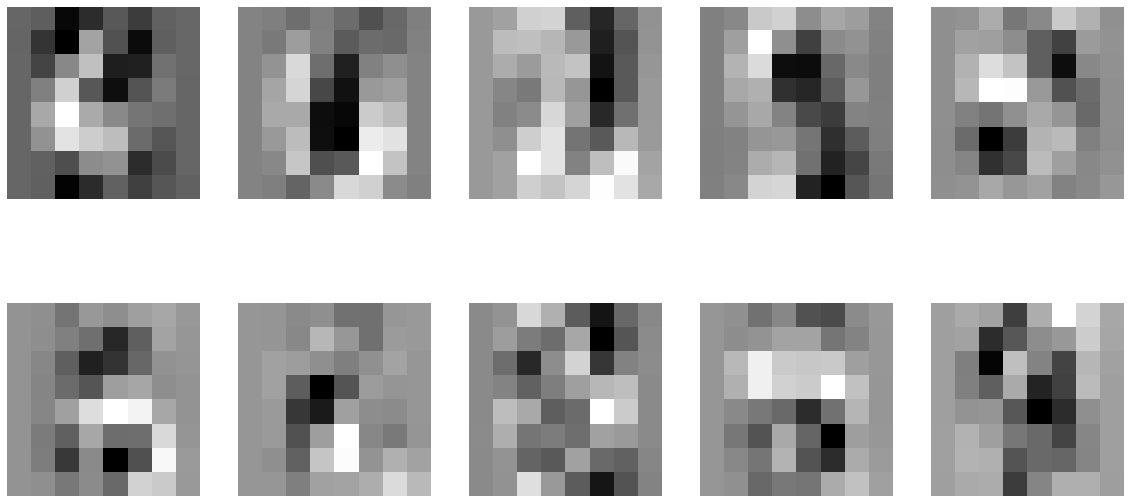

In [8]:
fig = plt.figure(figsize=(20,10))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    image = pca.components_[j,:] # Constructs a rescaled/shifted version of PCA vector
    image_reshaped = image.reshape(8,8) # Reshapes so that the image looks like a vector
    plt.imshow(image_reshaped, cmap='gray')
    
plt.show()

### Projecting to Subspaces

Let $\{\vec{v}_1,\ldots,\vec{v}_{64}\}$ be our PCA basis. 

Recall that we can represent a vector $\vec{x} \in \mathbb{R}^{64}$ with respect to this basis (i.e., as a linear combination of the elements of the basis) using formula
$$
\vec{x} = \sum_{i=1}^{64} \langle \vec{x}, \vec{v}_i \rangle \vec{v}_i.
$$
That is, the $i$th coefficient of the linear combination is given by the inner (dot) product $\langle \vec{x}, \vec{v}_i \rangle$. This formula is so simple because our PCA basis is orthonormal!

The following code block finds these coefficients for every vector in our dataset. The resulting data matrix `X_pca` is $1797 \times 64$. Each row contains the 64 PCA coefficients for the corresponding data point.

In [9]:
X_pca = pca.transform(X)
print(f"The size of X_pca is {X_pca.shape[0]} rows by {X_pca.shape[1]} columns.")

The size of X_pca is 1797 rows by 64 columns.


If we take the first $k \leq 64$ columns of this matrix, then it gives us a projection of our data to the linear subspace
$$
\mathrm{span}[ \{\vec{v}_1,\ldots,\vec{v}_k\} ].
$$

For example, if we take the first 2 columns, then we get a representation of our data in a 2-dimensional plane. The following code block plots our data in two dimensions.

**Note:** We did this a different way during the in-class code demonstration.

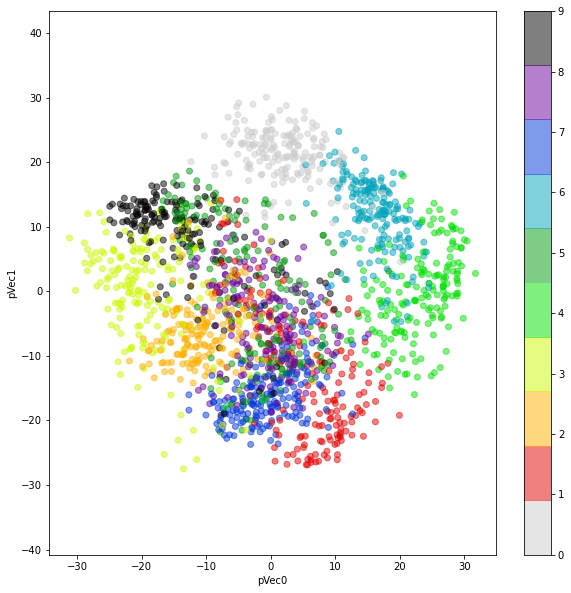

In [10]:
plt.figure(figsize=(10,10))

plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))

plt.xlabel('pVec0')
plt.ylabel('pVec1')
plt.axis('equal')
plt.colorbar();

The points are colored by the digit that they represent. We see that, even when projecting to only 2-dimensions, the different classes (digits) in our dataset are fairly well-separated.

### Visualizing the Projections

Here is another intuitive way to see how well the projections onto PCA subspaces capture the data.

The following code block plots a figure. Given a vector $\vec{x}$ from the dataset (i.e., an MNIST image), we plot the original image, then we plot the projection of $\vec{x}$ (as an image) onto the subspace $\mathrm{span}[ \{\vec{v}_1,\ldots,\vec{v}_k\} ]$ for values of $k = 1,5,10,20,30$.

To do this, we need to get the vector
$$
\sum_{i=1}^k \langle\vec{x},\vec{v}_i\rangle \vec{v}_i.
$$
This can be done via matrix multiplication:
$$
\sum_{i=1}^k \langle\vec{x},\vec{v}_i\rangle \vec{v}_i = \left[ \vec{v}_1 \, \vec{v}_2 \, \cdots \, \vec{v}_k \right] \left[\begin{matrix} \langle \vec{x}, \vec{v}_1 \rangle \\ \vdots \\ \langle \vec{x}, \vec{v}_k \rangle \end{matrix} \right].
$$
This matrix multiplication is carried out in the code below (although its implemented in a 'transposed' form---see if you can find it).

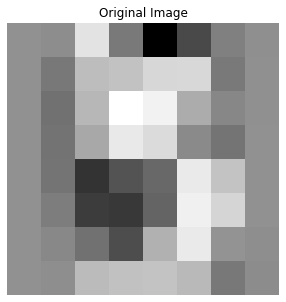

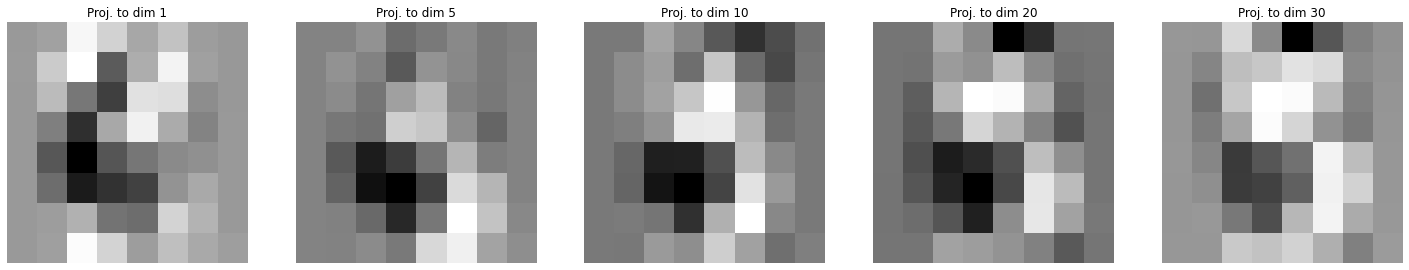

In [11]:
idx = 5 #Index of the datapoint that we will plot. Feel free to change this to see different results.
ks = [1,5,10,20,30] #Dimensions of the subspaces we will project to. You can also change these.


plt.figure(figsize = (5,5))
plt.imshow((X[idx,:]).reshape(8,8), cmap = 'gray')
plt.axis('off')
plt.title('Original Image')
plt.show()

fig = plt.figure(figsize=(25,5))

for j,k in enumerate(ks):
    fig.add_subplot(1,len(ks),j+1)
    plt.axis('off')
    plt.title(f'Proj. to dim {k}')
    image = X_pca[idx,:k]@pca.components_[:k,:] # This computes the projection image
    image_reshaped = image.reshape(8,8)
    plt.imshow(image_reshaped, cmap='gray')
    
plt.show()

We see that the projected image more closely resembles the original as we increase the subspace dimension. By the time we get to $k=30$, the result looks pretty good (even though the 'true' data dimension is 64).

## Exercises: PCA on Faces Dataset

Now it is your turn to create similar code on a new dataset. The 'Olivetti Faces' dataset. 

**Note:** You can answer every one of these questions by finding an analogous block of code above and making some small adjustments!

I'll load it for you here:

In [12]:
from sklearn.datasets import fetch_olivetti_faces
X, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)
n_samples, n_features = X.shape

**Exercise:** Write some code to print out the shape of `X`. How many samples/features does this dataset have?

In [13]:
## Your code goes here ##

You should see that this dataset has fewer samples than MNIST, but that it is much higher dimensional.

This is another image dataset. Each image is a closeup greyscale photo of a person's face. These images are higher resolution than MNIST, as they are 64x64 pixels. The following code shows some examples.

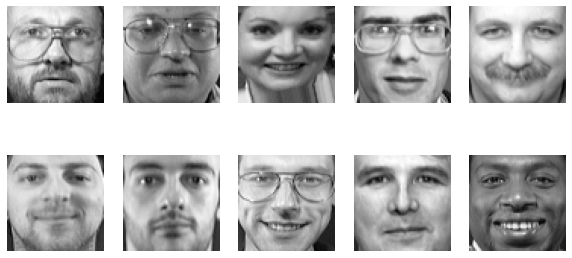

In [14]:
fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(X[j,:].reshape(64,64), cmap='gray')
    
plt.show()

**Exercise:** Write code which replaces `X` with a 'mean-centered' version of `X`. I.e., subtract off the mean (refer to a code block above if you forgot how to do this). Your mean-centered data should still be named `X`.

In [15]:
X = X - np.mean(X, axis = 0)

This block plots the mean-centered data.

In [ ]:
fig = plt.figure(figsize=(10,5))

for j in range(10):
    fig.add_subplot(2,5,j+1)
    plt.axis('off')
    plt.imshow(X[j,:].reshape(64,64), cmap='gray')
    
plt.show()

**Exercise:** Fit a pca model to the faces dataset.

In [16]:
pca = PCA()
proj = pca.fit(X) # Solves the PCA problem for our dataset X

In [17]:
pca.components_.shape

(400, 4096)

**Exercise:** Show images of the first ten eigenvectors.

**Hint:** We did the same thing above for MNIST. You should only have to make a small change to one of the code blocks above (pay attention to dimensions!).

In [ ]:
## Your code goes here ##

**Exercise:** Pick a vector for the dataset and plot its image after projecting to a some PCA subspaces of various dimensions (similar to what we did for MNIST above). Remember to create a variable like `X_pca` from the MNIST example. I recommend using higher dimensional PCA subspaces here (e.g., going up to $k=200$) to see how the image converges to the original.

In [ ]:
## Your code goes here ##